In [1]:
# installing basic python3 library
!pip freeze
!pip3 install numpy
!pip3 install pandas
!pip3 install sklearn
!pip3 install matplotlib
!pip3 install pydotplus
!pip3 install six


alabaster==0.7.12
altair==4.1.0
anaconda-client==1.7.2
anaconda-navigator==1.10.0
anaconda-project==0.8.3
argh==0.26.2
argon2-cffi @ file:///C:/ci/argon2-cffi_1596828585465/work
asn1crypto @ file:///tmp/build/80754af9/asn1crypto_1596577642040/work
astroid @ file:///C:/ci/astroid_1592487315634/work
astropy==4.0.2
async-generator==1.10
atomicwrites==1.4.0
attrs @ file:///tmp/build/80754af9/attrs_1604765588209/work
autopep8 @ file:///tmp/build/80754af9/autopep8_1596578164842/work
Babel @ file:///tmp/build/80754af9/babel_1605108370292/work
backcall==0.2.0
backports.functools-lru-cache==1.6.1
backports.shutil-get-terminal-size==1.0.0
backports.tempfile==1.0
backports.weakref==1.0.post1
bcrypt @ file:///C:/ci/bcrypt_1597936263757/work
beautifulsoup4 @ file:///tmp/build/80754af9/beautifulsoup4_1601924105527/work
bitarray @ file:///C:/ci/bitarray_1605065210072/work
bkcharts==0.2
bleach @ file:///tmp/build/80754af9/bleach_1600439572647/work
bokeh @ file:///C:/ci/bokeh_1603297934731/work
boto==2

In [1]:
import numpy as np
import pandas as pd 
df_world = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv', index_col = 1) # Read the csv file 
df_world.head()

,location,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
iso_code,,,,,,,,,,,
AFG,Afghanistan,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
AFG,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
AFG,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
AFG,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
AFG,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0


In [2]:
# df is Canadian covid data
df_vaccinated = df_world.loc[["CAN"], ["date", "people_vaccinated_per_hundred"]]
df_vaccinated['date'] = pd.to_datetime(df_vaccinated['date'])

df_fully_vaccinated = df_world.loc[["CAN"], ["date", "people_fully_vaccinated_per_hundred"]]
df_fully_vaccinated['date'] = pd.to_datetime(df_fully_vaccinated['date'])

import datetime as dt
df_vaccinated['date_transformed'] = df_vaccinated['date'].map(dt.datetime.toordinal) 
df_fully_vaccinated['date_transformed'] = df_fully_vaccinated['date'].map(dt.datetime.toordinal)
df_vaccinated.head()


,date,people_vaccinated_per_hundred,date_transformed
iso_code,,,
CAN,2020-12-14,0.00,737773
CAN,2020-12-15,0.00,737774
CAN,2020-12-16,0.01,737775
CAN,2020-12-17,0.02,737776
CAN,2020-12-18,0.03,737777


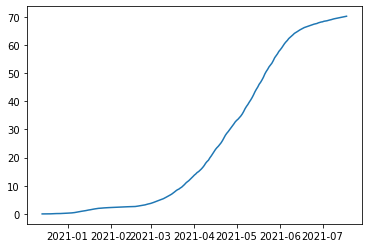

In [15]:
#Visualilze df
import matplotlib.pyplot as plt
x=df_vaccinated['date']
y=df_vaccinated['people_vaccinated_per_hundred']
plt.plot(x,y)
plt.show()

#df = df.set_index('date')
#ax = df.plot()
#plt.show()

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
X = df_vaccinated['date_transformed'].values.reshape(-1,1)


In [17]:
y = df_vaccinated['people_vaccinated_per_hundred'].values

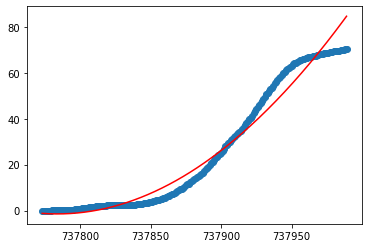

In [22]:
polynomial_features = PolynomialFeatures(degree = 5)
x_poly = polynomial_features.fit_transform(X)
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
y_poly_pred

plt.plot(X, y_poly_pred, color='red')
plt.scatter(X ,y)
plt.show()


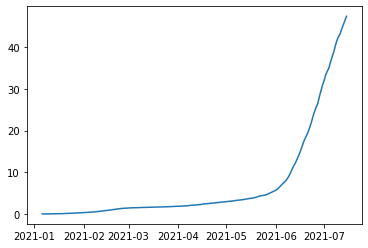

In [160]:
import matplotlib.pyplot as plt
x=df_fully_vaccinated['date']
y=df_fully_vaccinated['people_fully_vaccinated_per_hundred']
plt.plot(x,y)
plt.show()

In [179]:
df_fully_vaccinated = df_fully_vaccinated.dropna()

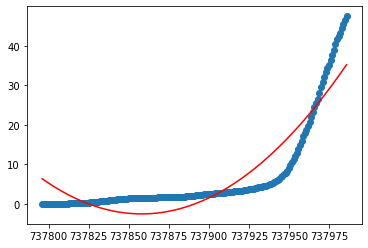

In [184]:
X = df_fully_vaccinated['date_transformed'].values[:,np.newaxis]
y = df_fully_vaccinated['people_fully_vaccinated_per_hundred'].values
polynomial_features = PolynomialFeatures(degree = 3)
x_poly = polynomial_features.fit_transform(X)
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
plt.plot(X, y_poly_pred, color='red')
plt.scatter(X,y)

In [85]:
Range = df['date_transformed'].max() + round(len(df)/2) + 10
predict_dates = list(range(df['date_transformed'].max() + 1, Range))
Predictions = model.predict(polynomial_features.fit_transform(np.array(predict_dates).reshape(-1,1)))

In [64]:
Predictions_df = pd.DataFrame({'Future_dates': list(predict_dates),'Predictions': list(Predictions)})
Predictions_df = Predictions_df.set_index(Predictions_df['Future_dates'].map(dt.datetime.fromordinal))

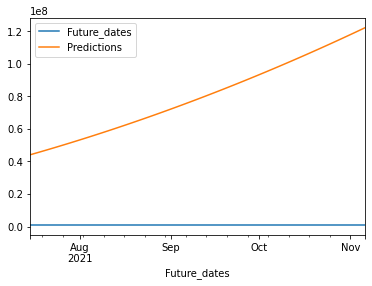

In [65]:
Predictions_df.plot()
plt.show()

In [66]:
df.head()

,total_vaccinations,date_transformed
date,,
2020-12-14,5.0,737773
2020-12-15,723.0,737774
2020-12-16,3023.0,737775
2020-12-17,7202.0,737776
2020-12-18,11174.0,737777


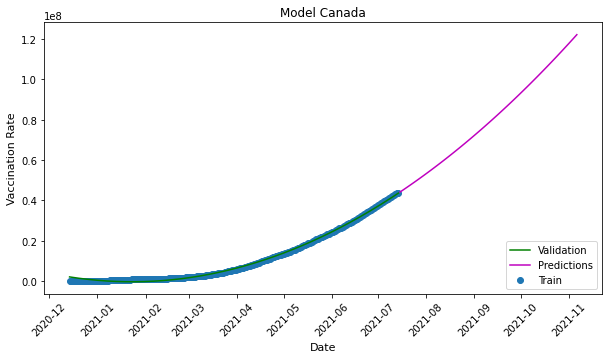

In [69]:

plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
plt.title('Model ' + 'Canada')
plt.xlabel('Date', fontsize=11)
plt.ylabel('Vaccination Rate', fontsize=11)
plt.scatter(df.index, df['total_vaccinations'])
plt.legend('Train', loc='lower right')
plt.plot(df.index , y_poly_pred, color = 'g')
plt.plot(Predictions_df[['Predictions']], color = 'm')
plt.legend('prediction', loc='lower right')
plt.legend(['Validation', 'Predictions', 'Train'], loc='lower right')
plt.show()